In [26]:
#Importações das Bibliotecas Principais
import pandas as pd #Auxiliam na manipulação de dados e arrays
import numpy as np 
import os #Facilita a manipulação de arquivos e diretórios
import matplotlib.pyplot as plt #Para criar gráficos e exibir imagens
import cv2 #OpenCV, utilizando para leiruta e processamento de imagens
import tensorflow as tf #Usados para construir, treinar e avaliar redes neurais
import imghdr #Verifica o tipo de arquivo da imagem
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.applications import VGG16, ResNet50V2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard, CSVLogger
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, Adamax
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array # type: ignore
from keras.utils import plot_model
import seaborn as sns #Para visualização de gráficos

In [27]:
pip install Pillow numpy opencv-python tensorflow


Note: you may need to restart the kernel to use updated packages.


In [28]:
#Deifinição dos diretórios de imagens e extensões válidas
angry='Imagens\Angry'
sad='Imagens\Sad'
happy='Imagens\happy'

image_exts = ['jpeg', 'jpg', 'png']

#Função para carregar e pré-processar imagens
def images(diretorio):
    images=[]
    for file in os.listdir(diretorio):
        img=(os.path.join(diretorio,file))
        if((imghdr.what(img) in image_exts)):
            img=cv2.imread(img,cv2.COLOR_BGR2GRAY)
            img=cv2.resize(img,(224,224))
            images.append(img)
    return images

#Carregando imagens para cada classe
angry_img=images(angry)
happy_img=images(happy)
sad_img=images(sad)

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\h'
C:\Users\rapha\AppData\Local\Temp\ipykernel_5496\1497313750.py:2: SyntaxWarning: invalid escape sequence '\A'
  angry='Imagens\Angry'
C:\Users\rapha\AppData\Local\Temp\ipykernel_5496\1497313750.py:3: SyntaxWarning: invalid escape sequence '\S'
  sad='Imagens\Sad'
C:\Users\rapha\AppData\Local\Temp\ipykernel_5496\1497313750.py:4: SyntaxWarning: invalid escape sequence '\h'
  happy='Imagens\happy'


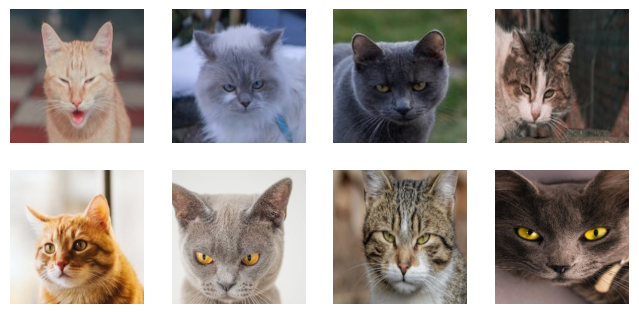

In [29]:
#Visualização das imagens
plt.figure(figsize=(8,8))
for i,file in enumerate (os.listdir(angry),1):
    img=os.path.join(angry,file)
    img=plt.imread(img)
    plt.subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    if(i==8):
        break

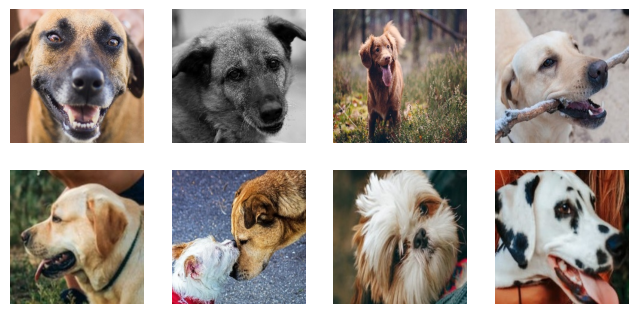

In [30]:
#Visualização das imagens
plt.figure(figsize=(8,8))
for i,file in enumerate (os.listdir(happy),1):
    img=os.path.join(happy,file)
    img=plt.imread(img)
    plt.subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    if(i==8):
        break

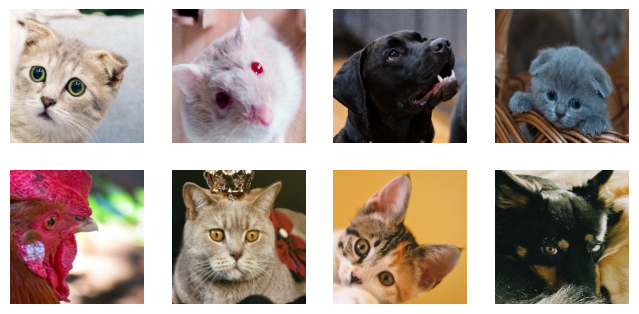

In [31]:
#Visualização das imagens
plt.figure(figsize=(8,8))
for i,file in enumerate (os.listdir(sad),1):
    img=os.path.join(sad,file)
    img=plt.imread(img)
    plt.subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    if(i==8):
        break

In [32]:
#Criação de rótulos para as classes
happy_labels = [0] * len(happy_img)
sad_labels = [1] * len(sad_img)
angry_labels = [2] * len(angry_img)

# Combinação de dados e normalização
X = np.array(happy_img + sad_img + angry_img)
y = np.array(happy_labels + sad_labels + angry_labels)
X = X.astype('float32') / 255.0

In [33]:
# Divisão dos dados em treino, validação e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,shuffle=True)

In [34]:
# Codificação One-Hot dos rótulos
from keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=3)
y_val_onehot = to_categorical(y_val, num_classes=3)

In [35]:
# Configuração e ajuste da ResNet50V2
ResNet50V2 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),
                                               include_top= False,
                                               weights='imagenet'
                                               )

ResNet50V2.trainable = True

for layer in ResNet50V2.layers[:-50]:
    layer.trainable = False

In [36]:
# Construção do modelo
def Create_ResNet50V2_Model():
    model = Sequential([
        ResNet50V2,
        GlobalAveragePooling2D(),
        Dropout(0.25),
        BatchNormalization(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    return model

In [37]:
model = Create_ResNet50V2_Model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,704,323 (90.42 MB)

 Trainable params: 16,487,683 (62.90 MB)

 Non-trainable params: 7,216,640 (27.53 MB)

In [38]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [39]:
# Treinamento do modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0.001,
                          patience=10,
                          restore_best_weights=True)
history = model.fit(
    X_train, y_train_onehot,
    epochs=50,
    validation_data=(X_val, y_val_onehot),
    callbacks=[earlystop]
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 106s 6s/step - accuracy: 0.4992 - loss: 1.4086 - val_accuracy: 0.3833 - val_loss: 8.3820
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 102s 7s/step - accuracy: 0.7473 - loss: 0.7287 - val_accuracy: 0.6000 - val_loss: 10.2926
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.8947 - loss: 0.4088 - val_accuracy: 0.5167 - val_loss: 3.6219
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 148s 10s/step - accuracy: 0.9521 - loss: 0.1656 - val_accuracy: 0.5583 - val_loss: 2.1749
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 130s 9s/step - accuracy: 0.9662 - loss: 0.0967 - val_accuracy: 0.6083 - val_loss: 3.0856
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 127s 9s/step - accuracy: 0.9824 - loss: 0.0456 - val_accuracy: 0.6250 - val_loss: 1.8619
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 144s 10s/step - accuracy: 0.9615 - loss: 0.1231 - val_accuracy: 0.6917 - val_loss: 1.7546
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 131s 9s/step - accuracy: 0.9627 - loss: 0.1073 - val_accuracy: 0.7333 -

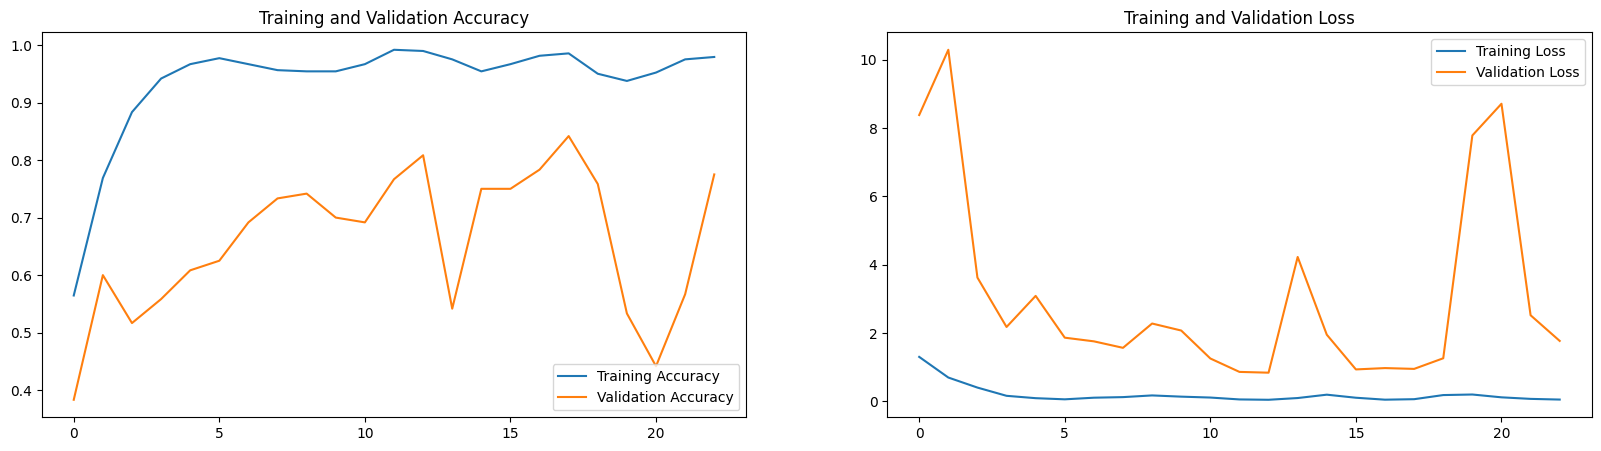

In [40]:
plot_training_history(history)

5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step


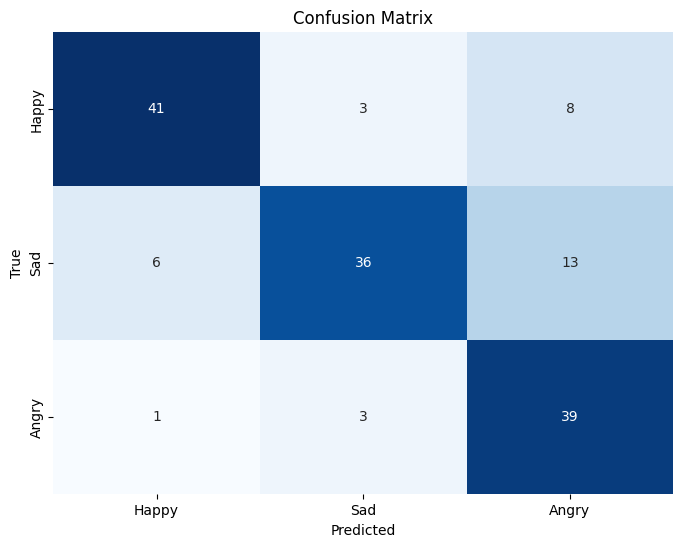

In [41]:
# Avaliação e matriz de confusão
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Happy', 'Sad', 'Angry'], yticklabels=['Happy', 'Sad', 'Angry'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [42]:
#Salva o modelo
model.save('pets_detection.keras')